In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb

#plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [5]:
alpha = 0.05
theta = 0.4
n = 20

$X_{(1)} \sim exp(\theta n)$

${\bf E} X_{(1)} = \sqrt{{\bf D} X_{(1)}} = \dfrac{1}{\theta n}$

len1 stands for estimate based on $\sum X_i$

For n = 20 theta = 0.1
len1 = 0.092 len2 = 0.553


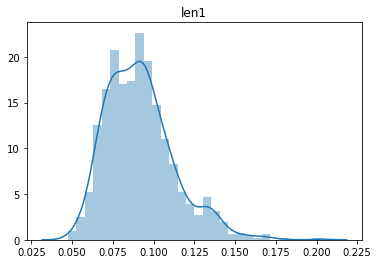

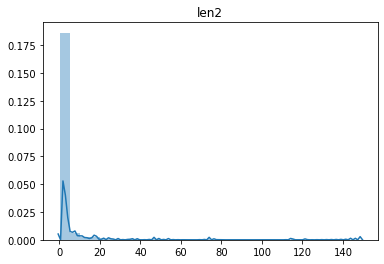



For n = 20 theta = 0.5
len1 = 0.459 len2 = 2.806


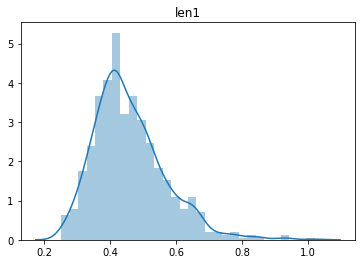

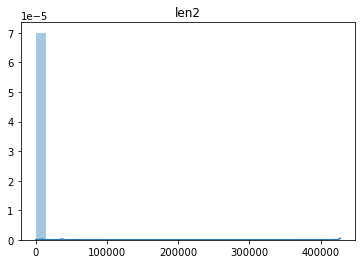



For n = 20 theta = 1
len1 = 0.919 len2 = 5.585


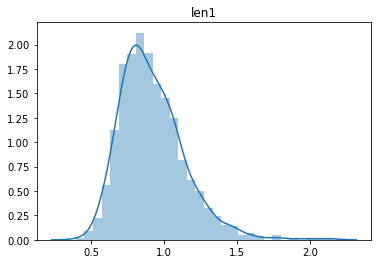

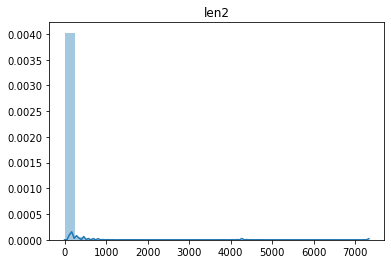



For n = 20 theta = 5
len1 = 4.585 len2 = 25.196


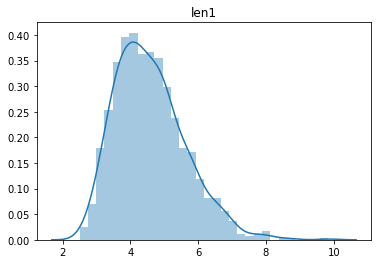

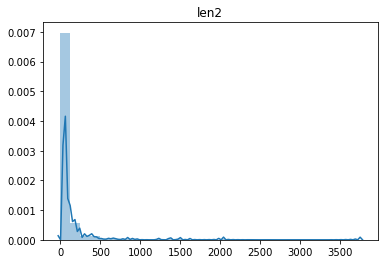



For n = 50 theta = 0.1
len1 = 0.056 len2 = 0.534


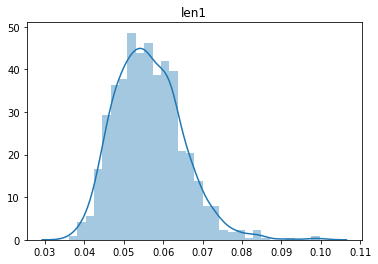

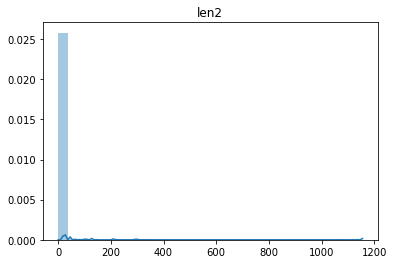



For n = 50 theta = 0.5
len1 = 0.282 len2 = 2.572


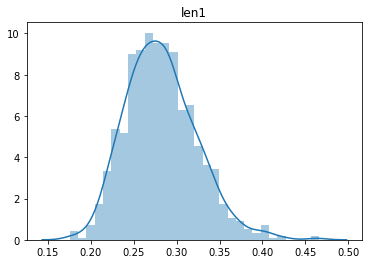

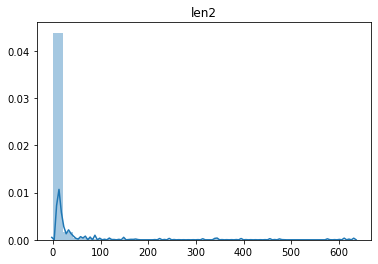



For n = 50 theta = 1
len1 = 0.564 len2 = 5.423


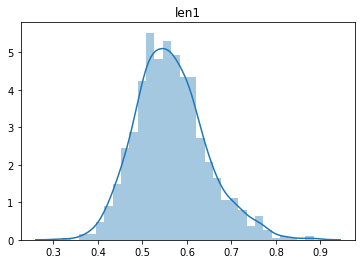

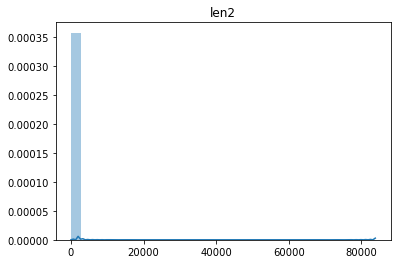



For n = 50 theta = 5
len1 = 2.832 len2 = 25.632


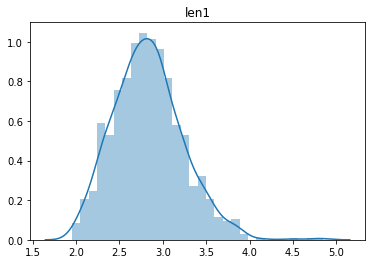

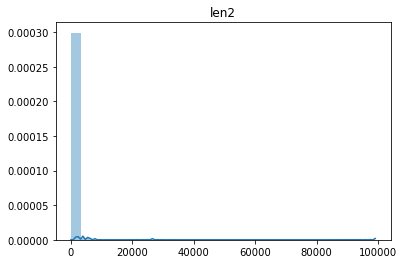



For n = 100 theta = 0.1
len1 = 0.04 len2 = 0.516


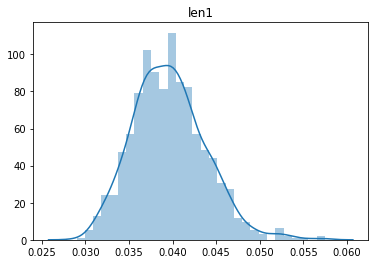

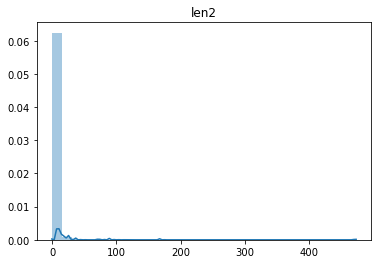



For n = 100 theta = 0.5
len1 = 0.197 len2 = 2.543


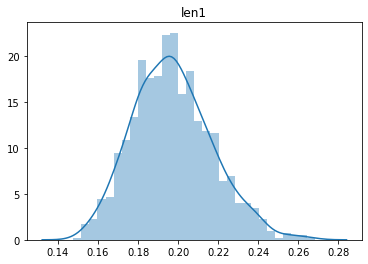

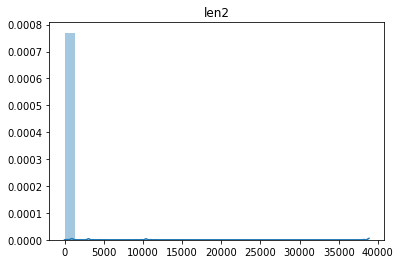



For n = 100 theta = 1
len1 = 0.394 len2 = 5.388


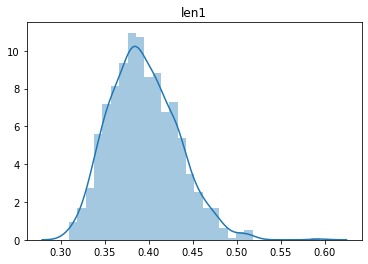

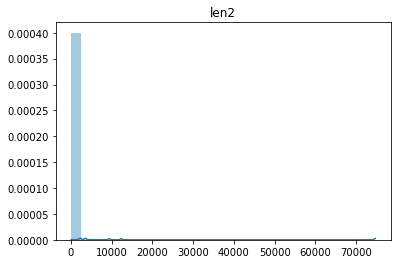



For n = 100 theta = 5
len1 = 1.971 len2 = 26.499


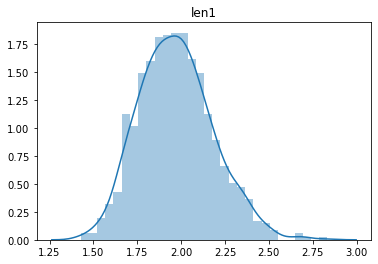

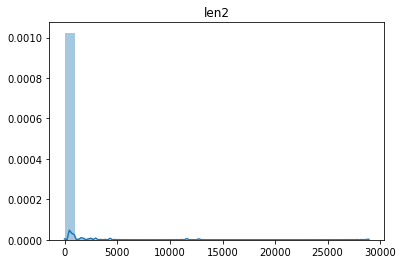

In [51]:
counter = 0

for n in [20, 50, 100]:
    for theta in [0.1, 0.5, 1, 5]:
        len1 = []; len2 = []
        for i in range(1000):
            mini_sample = stat.expon(scale = 1/theta).rvs(n)
            mean = mini_sample.mean()
            summa = mean * n
            minimum = mini_sample.min()

            len1.append((stat.gamma(n, 1).ppf(1 - alpha/2) - stat.gamma(n, 1).ppf(alpha/2)) / summa)
            #print(stat.gamma(n, 1).ppf(alpha/2) / summa, stat.gamma(n, 1).ppf(1 - alpha/2) / summa)
            
            len2.append((stat.expon().ppf(1 - alpha/2) - stat.expon().ppf(alpha/2))/(n * minimum))
            #print(stat.expon().ppf(1 - alpha/2) / (n * minimum), stat.expon().ppf(alpha/2)/(n * minimum))
        print('For n =', n, 'theta =', theta)
        print('len1 =', round(np.array(len1).mean(), 3), 'len2 =', round(np.median(np.array(len2)), 3))
        sb.distplot(len1, bins = 30)
        plt.title('len1')
        plt.show()
        sb.distplot(len2, bins = 30)
        plt.title('len2')
        plt.show()
        print('\n')
    

##### А теперь с оптимизацией $\beta$

beta_opt = 0.016308378213150225
For n = 20 theta = 0.1
len1 = 0.091 len2 = 0.455


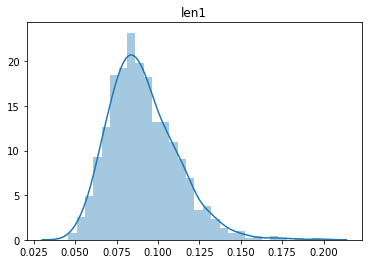



beta_opt = 0.016308378213150225
For n = 20 theta = 0.5
len1 = 0.454 len2 = 2.212


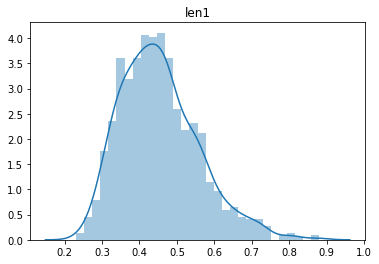



beta_opt = 0.016308378213150225
For n = 20 theta = 1
len1 = 0.904 len2 = 4.175


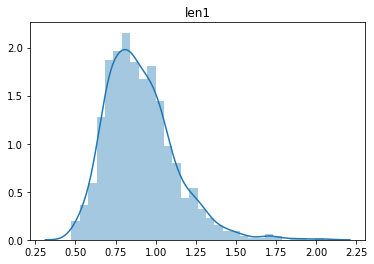



beta_opt = 0.016308378213150225
For n = 20 theta = 5
len1 = 4.553 len2 = 23.379


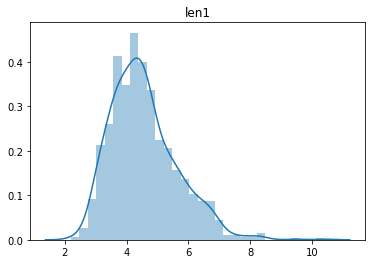



beta_opt = 0.019494031744005737
For n = 50 theta = 0.1
len1 = 0.056 len2 = 0.422


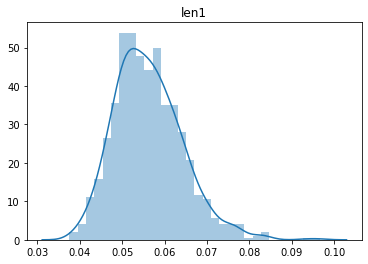



beta_opt = 0.019494031744005737
For n = 50 theta = 0.5
len1 = 0.28 len2 = 2.116


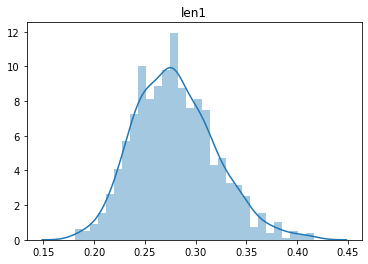



beta_opt = 0.019494031744005737
For n = 50 theta = 1
len1 = 0.562 len2 = 4.623


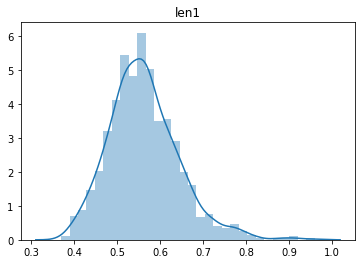



beta_opt = 0.019494031744005737
For n = 50 theta = 5
len1 = 2.812 len2 = 22.761


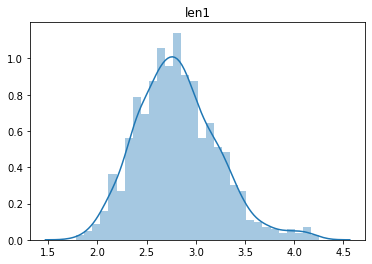



beta_opt = 0.021105062638465722
For n = 100 theta = 0.1
len1 = 0.04 len2 = 0.432


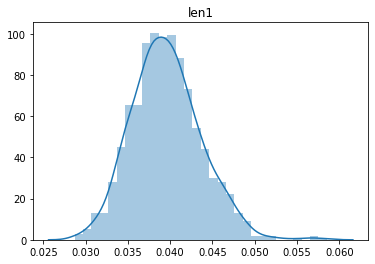



beta_opt = 0.021105062638465722
For n = 100 theta = 0.5
len1 = 0.197 len2 = 2.055


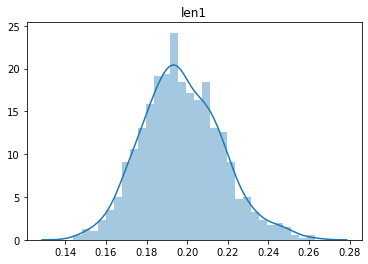



beta_opt = 0.021105062638465722
For n = 100 theta = 1
len1 = 0.395 len2 = 4.784


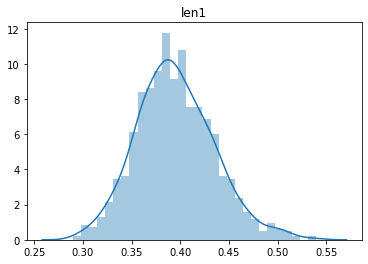



beta_opt = 0.021105062638465722
For n = 100 theta = 5
len1 = 1.976 len2 = 21.811


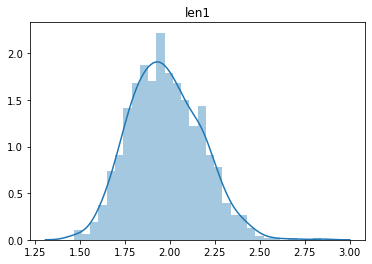

In [53]:
counter = 0

fun = lambda beta: -stat.gamma(n, 1).ppf(beta) + stat.gamma(n, 1).ppf(1 - alpha + beta)
fun2 = lambda beta: -stat.expon(1).ppf(beta) + stat.expon(1).ppf(1 - alpha + beta)

beta_opt2 = opt.minimize(fun2, x0 = alpha / 2, bounds = ((0, 1 - alpha),)).x[0]
#beta_opt = opt.minimize(fun, alpha/2, method = 'BFGS').x[0]

for n in [20, 50, 100]:
    for theta in [0.1, 0.5, 1, 5]:
        len1 = []; len2 = []
        beta_opt = opt.minimize(fun, x0 = alpha / 2, bounds = ((0, 1 - alpha),)).x[0]

        print('beta_opt =', beta_opt)
        for i in range(1000):
            mini_sample = stat.expon(scale = 1/theta).rvs(n)
            mean = mini_sample.mean()
            summa = mean * n
            minimum = mini_sample.min()
            

            len1.append((stat.gamma(n, 1).ppf(1 - alpha + beta_opt) - stat.gamma(n, 1).ppf(beta_opt)) / summa)
            #print(stat.gamma(n, 1).ppf(alpha/2) / summa, stat.gamma(n, 1).ppf(1 - alpha/2) / summa)
            
            len2.append((stat.expon().ppf(1 - alpha + beta_opt2) - stat.expon().ppf(beta_opt2))/(n * minimum))
            #print(stat.expon().ppf(1 - alpha/2) / (n * minimum), stat.expon().ppf(alpha/2)/(n * minimum))
        print('For n =', n, 'theta =', theta)
        print('len1 =', round(np.array(len1).mean(), 3), 'len2 =', round(np.median(np.array(len2)), 3))
        sb.distplot(len1, bins = 30)
        plt.title('len1')
        plt.show()
        #sb.distplot(len2, bins = 30)
        #plt.title('len2')
        #plt.show()
        print('\n')
    

In [ ]:
stat.gamma(n, 1).ppf(1 - alpha/2)) - stat.gamma(n, 1).ppf(alpha/2)) / summa